# Run model module locally

In [4]:
import os

# Import os environment variables for file hyperparameters.
os.environ["TRAIN_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10/train*.tfrecord"
os.environ["EVAL_FILE_PATTERN"] = "gs://machine-learning-1234-bucket/gan/data/cifar10/test*.tfrecord"
os.environ["OUTPUT_DIR"] = "gs://machine-learning-1234-bucket/gan/cdcgan/trained_model2"

# Import os environment variables for train hyperparameters.
os.environ["TRAIN_BATCH_SIZE"] = str(100)
os.environ["TRAIN_STEPS"] = str(50000)
os.environ["SAVE_SUMMARY_STEPS"] = str(100)
os.environ["SAVE_CHECKPOINTS_STEPS"] = str(5000)
os.environ["KEEP_CHECKPOINT_MAX"] = str(10)
os.environ["INPUT_FN_AUTOTUNE"] = "False"

# Import os environment variables for eval hyperparameters.
os.environ["EVAL_BATCH_SIZE"] = str(16)
os.environ["EVAL_STEPS"] = str(10)
os.environ["START_DELAY_SECS"] = str(6000)
os.environ["THROTTLE_SECS"] = str(6000)

# Import os environment variables for image hyperparameters.
os.environ["HEIGHT"] = str(32)
os.environ["WIDTH"] = str(32)
os.environ["DEPTH"] = str(3)

# Import os environment variables for label hyperparameters.
num_classes = 10
os.environ["NUM_CLASSES"] = str(num_classes)
os.environ["LABEL_EMBEDDING_DIMENSION"] = str(10)

# Import os environment variables for generator hyperparameters.
os.environ["LATENT_SIZE"] = str(512)
os.environ["GENERATOR_PROJECTION_DIMS"] = "4,4,256"
os.environ["GENERATOR_USE_LABELS"] = "True"
os.environ["GENERATOR_EMBED_LABELS"] = "True"
os.environ["GENERATOR_CONCATENATE_LABELS"] = "True"
os.environ["GENERATOR_NUM_FILTERS"] = "128,128,128"
os.environ["GENERATOR_KERNEL_SIZES"] = "4,4,4"
os.environ["GENERATOR_STRIDES"] = "2,2,2"
os.environ["GENERATOR_FINAL_NUM_FILTERS"] = str(3)
os.environ["GENERATOR_FINAL_KERNEL_SIZE"] = str(3)
os.environ["GENERATOR_FINAL_STRIDE"] = str(1)
os.environ["GENERATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["GENERATOR_FINAL_ACTIVATION"] = "tanh"
os.environ["GENERATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["GENERATOR_OPTIMIZER"] = "Adam"
os.environ["GENERATOR_LEARNING_RATE"] = str(0.0002)
os.environ["GENERATOR_ADAM_BETA1"] = str(0.5)
os.environ["GENERATOR_ADAM_BETA2"] = str(0.999)
os.environ["GENERATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["GENERATOR_CLIP_GRADIENTS"] = "None"
os.environ["GENERATOR_TRAIN_STEPS"] = str(1)

# Import os environment variables for discriminator hyperparameters.
os.environ["DISCRIMINATOR_USE_LABELS"] = "True"
os.environ["DISCRIMINATOR_EMBED_LABELS"] = "True"
os.environ["DISCRIMINATOR_CONCATENATE_LABELS"] = "True"
os.environ["DISCRIMINATOR_NUM_FILTERS"] = "64,128,128,256"
os.environ["DISCRIMINATOR_KERNEL_SIZES"] = "3,3,3,3"
os.environ["DISCRIMINATOR_STRIDES"] = "1,2,2,2"
os.environ["DISCRIMINATOR_DROPOUT_RATES"] = "0.3,0.3,0.3,0.3"
os.environ["DISCRIMINATOR_LEAKY_RELU_ALPHA"] = str(0.2)
os.environ["DISCRIMINATOR_L1_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_L2_REGULARIZATION_SCALE"] = str(0.)
os.environ["DISCRIMINATOR_OPTIMIZER"] = "Adam"
os.environ["DISCRIMINATOR_LEARNING_RATE"] = str(0.0002)
os.environ["DISCRIMINATOR_ADAM_BETA1"] = str(0.5)
os.environ["DISCRIMINATOR_ADAM_BETA2"] = str(0.999)
os.environ["DISCRIMINATOR_ADAM_EPSILON"] = str(1e-8)
os.environ["DISCRIMINATOR_CLIP_GRADIENTS"] = "None"
os.environ["DISCRIMINATOR_TRAIN_STEPS"] = str(1)
os.environ["LABEL_SMOOTHING"] = str(0.9)


## Train cdcgan model

In [ ]:
%%bash
gsutil -m rm -rf ${OUTPUT_DIR}
export PYTHONPATH=$PYTHONPATH:$PWD/cdcgan_module
python3 -m trainer.task \
    --train_file_pattern=${TRAIN_FILE_PATTERN} \
    --eval_file_pattern=${EVAL_FILE_PATTERN} \
    --output_dir=${OUTPUT_DIR} \
    --job-dir=./tmp \
    \
    --train_batch_size=${TRAIN_BATCH_SIZE} \
    --train_steps=${TRAIN_STEPS} \
    --save_summary_steps=${SAVE_SUMMARY_STEPS} \
    --save_checkpoints_steps=${SAVE_CHECKPOINTS_STEPS} \
    --keep_checkpoint_max=${KEEP_CHECKPOINT_MAX} \
    --input_fn_autotune=${INPUT_FN_AUTOTUNE} \
    \
    --eval_batch_size=${EVAL_BATCH_SIZE} \
    --eval_steps=${EVAL_STEPS} \
    --start_delay_secs=${START_DELAY_SECS} \
    --throttle_secs=${THROTTLE_SECS} \
    \
    --height=${HEIGHT} \
    --width=${WIDTH} \
    --depth=${DEPTH} \
    \
    --num_classes=${NUM_CLASSES} \
    --label_embedding_dimension=${LABEL_EMBEDDING_DIMENSION} \
    \
    --latent_size=${LATENT_SIZE} \
    --generator_projection_dims=${GENERATOR_PROJECTION_DIMS} \
    --generator_use_labels=${GENERATOR_USE_LABELS} \
    --generator_embed_labels=${GENERATOR_EMBED_LABELS} \
    --generator_concatenate_labels=${GENERATOR_CONCATENATE_LABELS} \
    --generator_num_filters=${GENERATOR_NUM_FILTERS} \
    --generator_kernel_sizes=${GENERATOR_KERNEL_SIZES} \
    --generator_strides=${GENERATOR_STRIDES} \
    --generator_final_num_filters=${GENERATOR_FINAL_NUM_FILTERS} \
    --generator_final_kernel_size=${GENERATOR_FINAL_KERNEL_SIZE} \
    --generator_final_stride=${GENERATOR_FINAL_STRIDE} \
    --generator_leaky_relu_alpha=${GENERATOR_LEAKY_RELU_ALPHA} \
    --generator_final_activation=${GENERATOR_FINAL_ACTIVATION} \
    --generator_l1_regularization_scale=${GENERATOR_L1_REGULARIZATION_SCALE} \
    --generator_l2_regularization_scale=${GENERATOR_L2_REGULARIZATION_SCALE} \
    --generator_optimizer=${GENERATOR_OPTIMIZER} \
    --generator_learning_rate=${GENERATOR_LEARNING_RATE} \
    --generator_adam_beta1=${GENERATOR_ADAM_BETA1} \
    --generator_adam_beta2=${GENERATOR_ADAM_BETA2} \
    --generator_adam_epsilon=${GENERATOR_ADAM_EPSILON} \
    --generator_clip_gradients=${GENERATOR_CLIP_GRADIENTS} \
    --generator_train_steps=${GENERATOR_TRAIN_STEPS} \
    \
    --discriminator_use_labels=${DISCRIMINATOR_USE_LABELS} \
    --discriminator_embed_labels=${DISCRIMINATOR_EMBED_LABELS} \
    --discriminator_concatenate_labels=${DISCRIMINATOR_CONCATENATE_LABELS} \
    --discriminator_num_filters=${DISCRIMINATOR_NUM_FILTERS} \
    --discriminator_kernel_sizes=${DISCRIMINATOR_KERNEL_SIZES} \
    --discriminator_strides=${DISCRIMINATOR_STRIDES} \
    --discriminator_dropout_rates=${DISCRIMINATOR_DROPOUT_RATES} \
    --discriminator_leaky_relu_alpha=${DISCRIMINATOR_LEAKY_RELU_ALPHA} \
    --discriminator_l1_regularization_scale=${DISCRIMINATOR_L1_REGULARIZATION_SCALE} \
    --discriminator_l2_regularization_scale=${DISCRIMINATOR_L2_REGULARIZATION_SCALE} \
    --discriminator_optimizer=${DISCRIMINATOR_OPTIMIZER} \
    --discriminator_learning_rate=${DISCRIMINATOR_LEARNING_RATE} \
    --discriminator_adam_beta1=${DISCRIMINATOR_ADAM_BETA1} \
    --discriminator_adam_beta2=${DISCRIMINATOR_ADAM_BETA2} \
    --discriminator_adam_epsilon=${DISCRIMINATOR_ADAM_EPSILON} \
    --discriminator_clip_gradients=${DISCRIMINATOR_CLIP_GRADIENTS} \
    --discriminator_train_steps=${DISCRIMINATOR_TRAIN_STEPS} \
    --label_smoothing=${LABEL_SMOOTHING}

## Prediction

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [1]:
!gsutil ls gs://machine-learning-1234-bucket/gan/cdcgan/trained_model2/export/exporter

gs://machine-learning-1234-bucket/gan/cdcgan/trained_model2/export/exporter/
gs://machine-learning-1234-bucket/gan/cdcgan/trained_model2/export/exporter/1592853236/
gs://machine-learning-1234-bucket/gan/cdcgan/trained_model2/export/exporter/1592859903/


In [5]:
predict_fn = tf.contrib.predictor.from_saved_model(
    "gs://machine-learning-1234-bucket/gan/cdcgan/trained_model2/export/exporter/1592859903"
)
predictions = predict_fn(
    {
        "Z": np.random.normal(size=(num_classes, 512)),
        "label": np.arange(num_classes)
    }
)

INFO:tensorflow:Restoring parameters from gs://machine-learning-1234-bucket/gan/cdcgan/trained_model2/export/exporter/1592859903/variables/variables


In [6]:
print(list(predictions.keys()))

['generated_images']


Convert image back to the original scale.

In [7]:
generated_images = np.clip(
    a=((predictions["generated_images"] + 1.0) * (255. / 2)).astype(np.int32),
    a_min=0,
    a_max=255
)

In [8]:
print(generated_images.shape)

(10, 32, 32, 3)


In [9]:
def plot_images(images):
    """Plots images.

    Args:
        images: np.array, array of images of
            [num_images, height, width, depth].
        
    """
    num_images = len(images)

    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        image = images[i]
        plt.subplot(1, num_images, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(
            image,
            cmap=plt.cm.binary
        )
    plt.show()

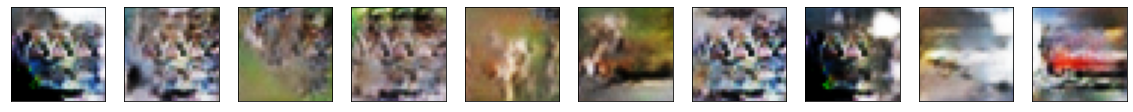

In [10]:
plot_images(generated_images)